# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [14]:
# Import the titanic dataset here
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [15]:
# Code here
passengers = df_titanic["name"]
passengers.head()

# Calculate the joint distribution between class and embarkation
joint_distribution = pd.crosstab(df_titanic["class"], df_titanic["embarked"])
print(joint_distribution)

embarked            B    C    Q    S
class                               
1st                 3  143    3  175
2nd                 6   26    7  245
3rd                 0  102  113  494
deck crew          23    0    0   43
engineering crew   43    0    0  281
restaurant staff    0    0    0   69
victualling crew  122    0    0  309


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [16]:
# Code here

# Calculate the joint distribution between class and embarkation
joint_distribution = pd.crosstab(df_titanic["class"], df_titanic["embarked"])

# Conditional distribution P(class | embarked)
cond_class_given_embarked = joint_distribution.div(joint_distribution.sum(axis=0), axis=1)
print("Conditional distribution of class given embarked:\n", cond_class_given_embarked)

# Conditional distribution P(embarked | class)
cond_embarked_given_class = joint_distribution.div(joint_distribution.sum(axis=1), axis=0)
print("Conditional distribution of embarked given class:\n", cond_embarked_given_class)

# To answer the specific questions:
# What proportion of 3rd class passengers embarked at Southampton?
proportion_3rd_class_southampton = cond_embarked_given_class.loc["3rd", "S"]
print("\nProportion of 3rd class passengers embarked at Southampton:", proportion_3rd_class_southampton)

# What proportion of Southampton passengers were in 3rd class?
proportion_southampton_3rd_class = cond_class_given_embarked.loc["3rd", "S"]
print("Proportion of Southampton passengers who were in 3rd class:", proportion_southampton_3rd_class)


Conditional distribution of class given embarked:
 embarked                 B         C         Q         S
class                                                   
1st               0.015228  0.527675  0.024390  0.108292
2nd               0.030457  0.095941  0.056911  0.151609
3rd               0.000000  0.376384  0.918699  0.305693
deck crew         0.116751  0.000000  0.000000  0.026609
engineering crew  0.218274  0.000000  0.000000  0.173886
restaurant staff  0.000000  0.000000  0.000000  0.042698
victualling crew  0.619289  0.000000  0.000000  0.191213
Conditional distribution of embarked given class:
 embarked                 B         C         Q         S
class                                                   
1st               0.009259  0.441358  0.009259  0.540123
2nd               0.021127  0.091549  0.024648  0.862676
3rd               0.000000  0.143865  0.159379  0.696756
deck crew         0.348485  0.000000  0.000000  0.651515
engineering crew  0.132716  0.000000  0.000

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

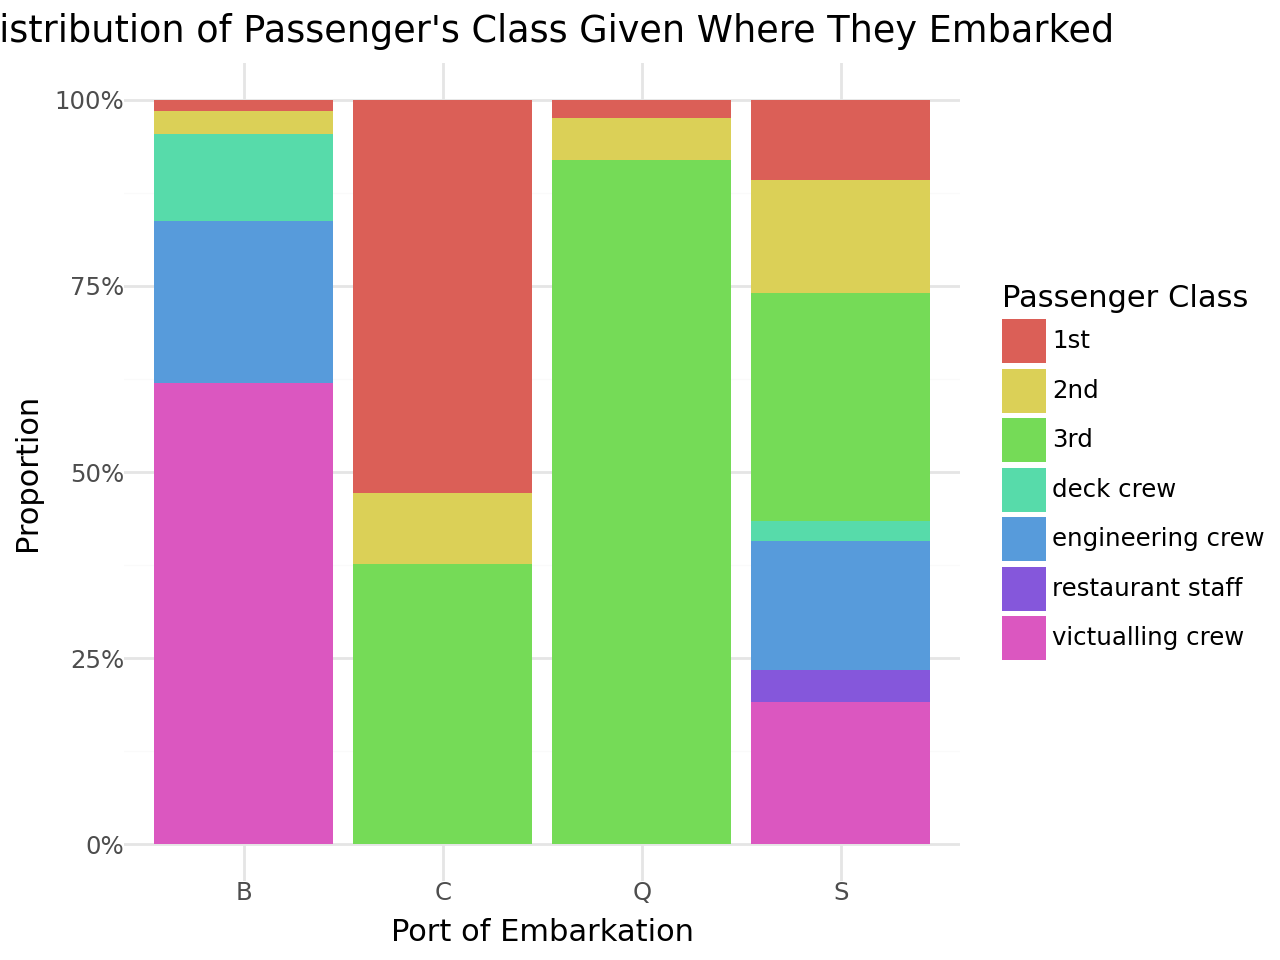

In [17]:
# Code here
from plotnine import *

# Convert the conditional distribution to a DataFrame for plotting
cond_class_given_embarked = pd.crosstab(df_titanic["class"], df_titanic["embarked"]).div(joint_distribution.sum(axis=0), axis=1)
cond_class_given_embarked = cond_class_given_embarked.reset_index().melt(id_vars="class")

# Create the plot
plot = (
    ggplot(cond_class_given_embarked, aes(x="embarked", y="value", fill="class")) +
    geom_bar(stat="identity", position="fill") +
    labs(
        title="Distribution of Passenger's Class Given Where They Embarked",
        x="Port of Embarkation",
        y="Proportion",
        fill="Passenger Class"
    ) +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +  # Show percentages
    theme_minimal()
)

plot
